# Demo về stochastic gradient descent

In [83]:
import warnings
warnings.filterwarnings('ignore')

import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [84]:
data = np.random.randn(500, 2)

In [85]:
data[0]

array([1.84896301, 0.44496464])

In [86]:
data[0, 0]

1.8489630067652179

In [87]:
data[0, 1]

0.4449646420802385

In [88]:
theta = np.zeros(2)

In [89]:
theta

array([0., 0.])

In [90]:
def loss_function(data, theta):
    m = theta[0]
    b = theta[1]
    loss = 0
    
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        y_hat = m*x + b
        loss = loss + (y - y_hat)**2
        
    mse = loss / float(len(data))
    return mse

In [91]:
loss_function(data, theta)

0.8481108433163166

In [92]:
def compute_gradients(data, theta):
    gradients = np.zeros(2)
    N = float(len(data))
    m = theta[0]
    b = theta[1]
    
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        
        gradients[0] += -(2/N) * x * (y - (m*x + b)) # gradient theo m
        gradients[1] += -(2/N) * (y - (theta[0]*x + b)) # gradient theo b
        
    epsilon = 1e-6
    gradients = np.divide(gradients, N + epsilon) # cộng thêm một epsilon để tránh lỗi chia cho 0
    
    return gradients

In [93]:
compute_gradients(data, theta)

array([5.07395093e-05, 1.21175359e-04])

In [94]:
def minibatch(data, theta, lr=1e-2, minibatch_ratio=0.01, num_iterations=1000):
    minibatch_size = int(math.ceil(len(data)) * minibatch_ratio)
    loss = []
    
    for t in range(num_iterations):
        sample_size = random.sample(range(len(data)), minibatch_size) 
        np.random.shuffle(data)
        
        sample_data = data[sample_size, :]
        grad = compute_gradients(sample_data, theta)
        theta = theta - (lr * grad)
        loss.append(loss_function(data, theta))
        
    return theta, loss

[-3.99574194e-05 -4.38615395e-02]


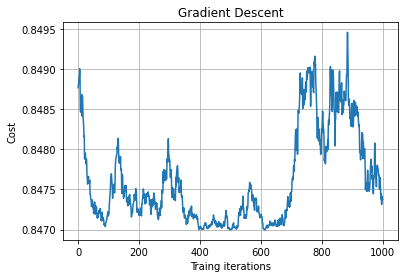

In [101]:
theta, loss = minibatch(data, theta)

print(theta)

plt.plot(loss)
plt.grid()
plt.xlabel('Traing iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()